In [64]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [65]:
def create_linear_model(sheet_name):
    kidney_df_cleaned = pd.read_csv("merged/"+sheet_name)
    Y = kidney_df_cleaned["Patient Survival Rate"]
    X = kidney_df_cleaned.drop(columns=['Unnamed: 0', 'N', 'Patient Survival Rate'])
    X = pd.get_dummies(X)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
    
    lr_model = LinearRegression()
    # Fitting the model
    lr_model.fit(X_train, Y_train)
    # Making predictions using the testing data
    predictions = lr_model.predict(X_test)
    
    score = lr_model.score(X_train, Y_train, sample_weight=None)
    r2 = r2_score(Y_test, predictions)
    print(f"Accuracy Score for {sheet_name}: {score}")
    print(f"r2 Score for {sheet_name}: {r2}")

In [66]:
# Read the CSV file into a Pandas DataFrame
kidney_df_cleaned = pd.read_csv("merged/5_Year_cleaned.csv")
kidney_df_cleaned

,Unnamed: 0,Transplant Year,Age Group,N,Graft_Survival_Rate,Patient Survival Rate,All ABO,O,A,B,...,Retransplant/Graft Failure,Tubular and Interstitial Diseases,"White, Non-Hispanic","Black, Non-Hispanic",Hispanic/Latino,Unknown,"Asian, Non-Hispanic","American Indian/Alaska Native, Non-Hispanic","Pacific Islander, Non-Hispanic","Multiracial, Non-Hispanic"
0,0,2017,<1 Year,0,0.00,0.00,0,0,0,0,...,0,0,119,45,57,0,14,4,3,7
1,1,2017,1-5 Years,175,92.93,98.18,183,94,59,23,...,1,13,294,95,132,0,32,2,4,16
2,2,2017,6-10 Years,113,94.58,99.09,131,72,37,20,...,4,16,155,55,66,0,9,3,0,4
3,3,2017,11-17 Years,370,85.37,97.46,432,223,138,55,...,29,14,380,148,202,0,30,5,5,13
4,4,2017,18-34,1949,86.04,97.91,2414,1105,878,310,...,259,126,1871,786,775,0,192,25,15,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,235,1988,11-17 Years,271,65.98,92.50,407,182,163,44,...,3,62,356,103,62,3,11,4,0,0
236,236,1988,18-34,2076,68.76,87.35,2794,1286,1060,322,...,10,235,2419,603,303,3,83,16,7,0
237,237,1988,35-49,2579,65.19,78.90,3289,1486,1274,383,...,8,201,3196,838,291,5,109,43,1,0
238,238,1988,50-64,1654,58.93,67.68,1926,876,730,232,...,2,112,2487,490,179,6,60,20,3,0


In [67]:
#kidney_df_cleaned["Patient_Survival_status"] = good_survival
Y = kidney_df_cleaned["Patient Survival Rate"]
X = kidney_df_cleaned.drop(columns=['Unnamed: 0', 'N', 'Patient Survival Rate'])

In [68]:
X = pd.get_dummies(X)
X

,Transplant Year,Graft_Survival_Rate,All ABO,O,A,B,AB,"Congenital, Rare, Familial, and Metaboli",Diabetes,Glomerular Disease,...,"Pacific Islander, Non-Hispanic","Multiracial, Non-Hispanic",Age Group_1-5 Years,Age Group_11-17 Years,Age Group_18-34,Age Group_35-49,Age Group_50-64,Age Group_6-10 Years,Age Group_65+,Age Group_<1 Year
0,2017,0.00,0,0,0,0,0,0,0,0,...,3,7,0,0,0,0,0,0,0,1
1,2017,92.93,183,94,59,23,7,81,0,16,...,4,16,1,0,0,0,0,0,0,0
2,2017,94.58,131,72,37,20,2,43,0,23,...,0,4,0,0,0,0,0,1,0,0
3,2017,85.37,432,223,138,55,16,107,1,142,...,5,13,0,1,0,0,0,0,0,0
4,2017,86.04,2414,1105,878,310,121,124,101,1019,...,15,31,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,1988,65.98,407,182,163,44,18,76,0,177,...,0,0,0,1,0,0,0,0,0,0
236,1988,68.76,2794,1286,1060,322,125,88,593,1220,...,7,0,0,0,1,0,0,0,0,0
237,1988,65.19,3289,1486,1274,383,146,32,780,1104,...,1,0,0,0,0,1,0,0,0,0
238,1988,58.93,1926,876,730,232,88,2,333,561,...,3,0,0,0,0,0,1,0,0,0


In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
X_train.shape

(180, 34)

In [70]:
# Create a random forest classifier
lr_model = LinearRegression()
# Fitting the model
lr_model.fit(X_train, Y_train)
# Making predictions using the testing data
predictions = lr_model.predict(X_test)
predictions

array([ 9.08735772e+01,  9.33946093e+01,  1.21146280e-02,  7.06480741e+01,
        7.06576743e+01,  9.78540953e+01,  9.21221658e+01,  9.97890908e+01,
        9.51894527e+01,  8.26993415e+01,  3.77078027e-02,  9.55116104e+01,
        7.17950330e+01,  1.00107229e+02, -8.16141388e-02,  6.13693784e+01,
        8.24400665e+01,  9.27492089e+01,  9.24688091e+01,  9.45302376e+01,
        9.49345143e+01,  8.91947838e+01,  9.65943131e+01,  9.47344595e+01,
        9.06741717e+01,  5.86498298e+01,  9.77925451e+01,  8.64069761e+01,
        7.45872103e+01,  9.64518171e+01,  9.58544828e+01,  6.94131750e+01,
        9.18722935e+01,  9.28110524e+01,  9.73557256e+01,  8.64889286e+01,
        7.44215124e+01,  1.00682121e+02,  9.39831987e+01,  8.06642342e+01,
        9.93817118e+01,  9.44703658e+01,  9.87421951e+01,  9.71126480e+01,
        8.40813339e+01,  9.80216884e+01,  1.00803529e+02,  9.41599167e+01,
        1.51891306e-01,  7.45855246e+01,  9.55705741e+01,  6.20578843e+01,
        9.45719762e+01,  

In [71]:
score = lr_model.score(X_train, Y_train, sample_weight=None)
r2 = r2_score(Y_test, predictions)
print(f"Accuracy Score : {score}")
print(f"r2 Score : {r2}")

Accuracy Score : 0.998681960585655
r2 Score : 0.9965273821084251


Text(0.5, 1.0, '5 year Survivability Prediction for 35-49 age group')

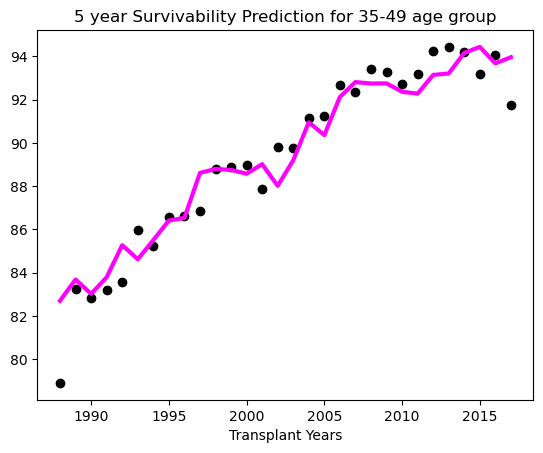

In [79]:
#Y_test
all_prediction = lr_model.predict(X)
X_Copy = X.copy()
X_Copy["actual"] = Y
X_Copy["Prediction"] = all_prediction
X_35_49 = X_Copy[X_Copy["Age Group_35-49"] == 1]
plt.scatter(X_35_49['Transplant Year'], X_35_49["actual"], color="black")
plt.plot(X_35_49['Transplant Year'], X_35_49["Prediction"], color="magenta", linewidth=3)
plt.xlabel('Transplant Years')
plt.title('5 year Survivability Prediction for 35-49 age group')

In [43]:
for sheet in ['1_Year_cleaned.csv', '3_Year_cleaned.csv', '5_Year_cleaned.csv', '10_Year_cleaned.csv', '15_Year_cleaned.csv', '20_Year_cleaned.csv']:
    create_linear_model(sheet)

Accuracy Score for 1_Year_cleaned.csv: 0.9995454531926082
r2 Score for 1_Year_cleaned.csv: 0.9985563213311694
Accuracy Score for 3_Year_cleaned.csv: 0.9991055295440959
r2 Score for 3_Year_cleaned.csv: 0.9977813635074265
Accuracy Score for 5_Year_cleaned.csv: 0.998681960585655
r2 Score for 5_Year_cleaned.csv: 0.9965273821084251
Accuracy Score for 10_Year_cleaned.csv: 0.9982129258191748
r2 Score for 10_Year_cleaned.csv: 0.9962123188633075
Accuracy Score for 15_Year_cleaned.csv: 0.996528616564367
r2 Score for 15_Year_cleaned.csv: 0.9470567506571431
Accuracy Score for 20_Year_cleaned.csv: 0.9952663840997822
r2 Score for 20_Year_cleaned.csv: 0.9898742405681381
